@chhy

In [27]:
# This script represent a standard template for SWAXS data analysis at Formax

# The template contains a sequence of standard data processing steps as follow:

# 1. Import the necessary libraries

# 2. set the data location and save location 

process_ = 'processed'
sample_name = ['fresh']

root_path = 'results/'

save_root_path = './results/' + process_

# 3. load the data

# for saxs: 0, for waxs: 1.
waxs = 1

if waxs:
    str_ = 'WAXS'
else:    
    str_ = 'SAXS'

# 4. plot the spectrum for different angles
## normalization is an option, depends on the beam currency

### 1. Import the necessary libraries

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py 
import hdf5plugin
import os, sys

### 2. Data directories & save location

In [29]:
try:
    os.mkdir(save_root_path)
except:
    print('Save path folder is already created!')

### 3. load the data & adjust (normalize) the intensities for different scans

loading WAXS data of sample fresh
(1, 441, 32, 2000)
(1, 2000)


Text(0.5, 0, 'q')

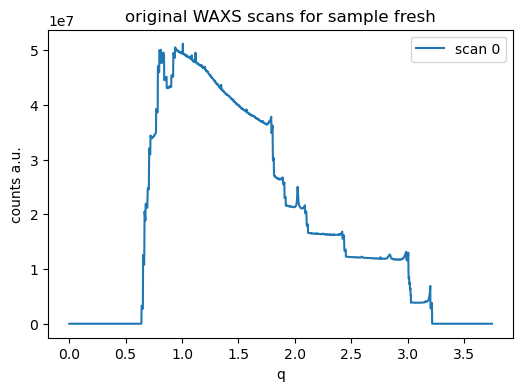

In [30]:
# load the data & get the 1D spectrum
name_ = sample_name[0]
data_path = root_path + name_ + '/data_azint_sub_%s.npz'%str_

data = np.load(data_path)['data']
q = np.load(data_path)['q']
print('loading %s data of sample %s'%(str_, name_))
print(data.shape)

data_1d = np.sum(data, axis=(1,2))
print(data_1d.shape)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i in range(data_1d.shape[0]):
    ax.plot(q, data_1d[i], label='scan %i' %i)

ax.legend()
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title ('original %s scans for sample %s'%(str_, name_))
ax.set_ylabel('counts a.u.')
ax.set_xlabel('q')

Text(0.5, 0, 'q')

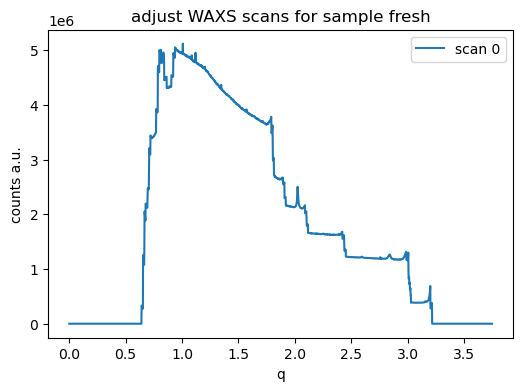

In [31]:
# normailize
coe=[0.1]
coe = np.array(coe)
data_1d_adjust = data_1d*coe

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i in range(data_1d.shape[0]):
    ax.plot(q, data_1d_adjust[i], label='scan %i' %i)

ax.legend()
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title ('adjust %s scans for sample %s'%(str_, name_))
ax.set_ylabel('counts a.u.')
ax.set_xlabel('q')

In [38]:
# combine all the angle into one dataset & save

int_data_1d_adjust = np.sum(data_1d_adjust, axis=0)

np.savez(save_root_path + '/data_1d_%s_%s.npz'%(str_,name_), data=int_data_1d_adjust, q=q)

### 4. load all the 1d data, plot them in one frame

In [40]:
# load all the 1d adata
data_1d_whole = []
q = np.load(save_root_path + '/data_1d_%s_%s.npz'%(str_, sample_name[0]))['q']

for i, name_ in enumerate(sample_name):
    temp_data_1d = np.load(save_root_path + '/data_1d_%s_%s.npz'%(str_, name_))['data']
    data_1d_whole.append(temp_data_1d)

data_1d_whole = np.array(data_1d_whole)
np.savez(save_root_path +'/data_1d_all_%s.npz'%str_, data=data_1d_whole, q=q)

In [42]:
# option: renorm? since the beam current?
re_norm = 0

Text(0.5, 0, 'q')

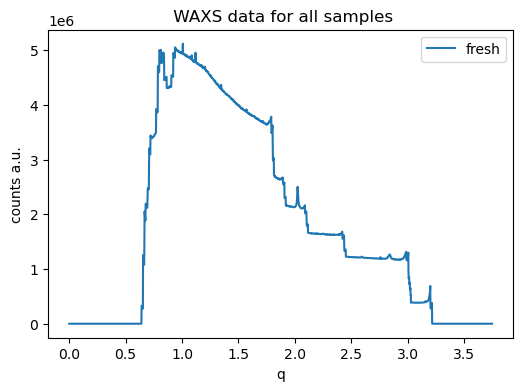

In [43]:
# plot the data 

fig, ax = plt.subplots(1, 1, figsize = (6,4))
for i, name_ in enumerate(sample_name):
    ax.plot(q, data_1d_whole[i], label='%s'%name_)
        
ax.legend()
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title (' %s data for all samples'%str_)
ax.set_ylabel('counts a.u.')
ax.set_xlabel('q')